In [3]:
# Data Understanding
import pandas as pd

df = pd.read_csv("Grocery_Inventory.csv")  # Update with the correct file name
# Inspect dataset structure
print(df.head())  # Displays the first five rows
print(df.info())  # Displays info about the dataset
print("Shape:", df.shape)  # Prints the shape (rows, columns)
print("Missing values:\n", df.isnull().sum())  # Fixed syntax error here
print("Duplicate rows:", df.duplicated().sum())  # Counts duplicate rows


      Product_Name             Catagory Supplier_Name  \
0      Bell Pepper  Fruits & Vegetables        Eimbee   
1    Vegetable Oil          Oils & Fats      Digitube   
2  Parmesan Cheese                Dairy        BlogXS   
3           Carrot  Fruits & Vegetables        Avaveo   
4           Garlic  Fruits & Vegetables          Katz   

        Warehouse_Location        Status   Product_ID  Supplier_ID  \
0  20 Pennsylvania Parkway  Discontinued  29-017-6255  43-348-2450   
1      03643 Oakridge Lane   Backordered  79-569-8856  04-854-7165   
2        73 Graedel Street  Discontinued  28-146-2641  82-995-0739   
3      44801 Myrtle Center  Discontinued  11-581-9869  22-867-3079   
4     6195 Monterey Center  Discontinued  13-202-4809  24-281-7685   

  Date_Received Last_Order_Date Expiration_Date  Stock_Quantity  \
0      3/1/2024        1/6/2025       1/31/2025              46   
1      4/1/2024       5/19/2024       6/11/2024              51   
2      4/1/2024      12/21/2024    

In [9]:
# Handle missing values: Use mean for numeric columns, mode for categorical
for col in df.columns:
    if df[col].dtype == 'object':  # Categorical columns
        df[col] = df[col].fillna(df[col].mode()[0])  # Fill with most frequent value
    else:  # Numeric columns
        df[col] = df[col].fillna(df[col].mean())  # Fill with mean

# Remove duplicates
df = df.drop_duplicates()

# Convert column names to consistent formatting (strip spaces and lowercase)
df.columns = df.columns.str.strip().str.lower()

print("Data Cleaning Done!")


Data Cleaning Done!


In [11]:
# Data Transformation & Encoding
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Convert categorical variables
encoder = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = encoder.fit_transform(df[col])

# Scale numerical features
scaler = StandardScaler()
df[df.select_dtypes(include=['number']).columns] = scaler.fit_transform(df.select_dtypes(include=['number']))

print("Data Transformation Completed!")


Data Transformation Completed!


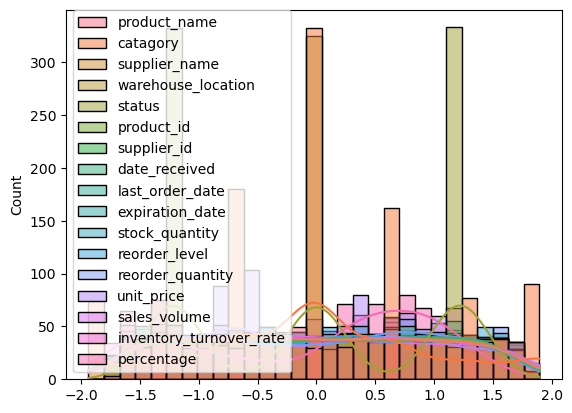

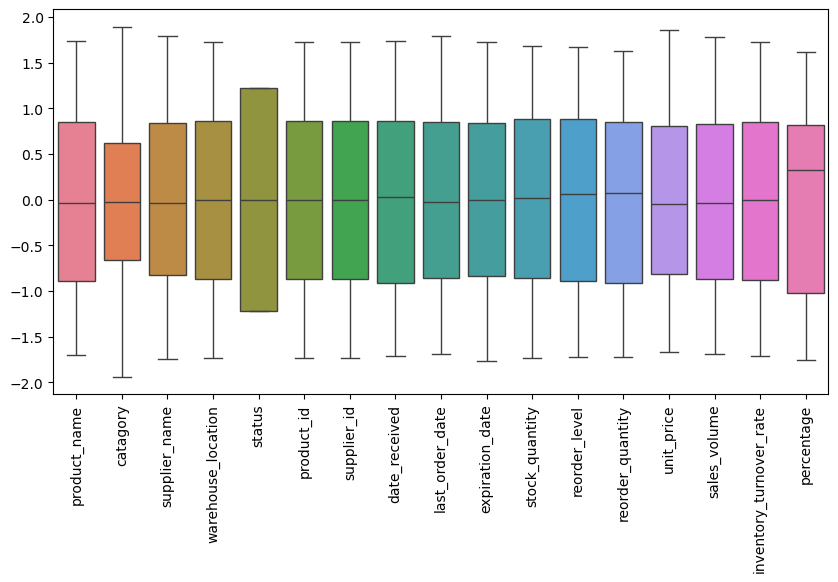

In [13]:
# Exploratory Data Analysis (EDA)
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution of numerical variables
sns.histplot(df.select_dtypes(include=['number']), kde=True)
plt.show()

# Boxplots to check for outliers
plt.figure(figsize=(10,5))
sns.boxplot(data=df.select_dtypes(include=['number']))
plt.xticks(rotation=90)
plt.show()

# Correlation Heatmap
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.show()


In [17]:
# Import required libraries and suppress warnings
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib
matplotlib.use('Agg')  # Use 'Agg' backend for matplotlib
import matplotlib.pyplot as plt
plt.switch_backend('Agg')  # For plt module imported from matplotlib
%matplotlib inline

import seaborn as sns
sns.set(style="whitegrid")

# For predictive modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.inspection import permutation_importance

# Setting figure size for plots
plt.rcParams['figure.figsize'] = (10, 6)

In [19]:
# Load the dataset
file_path = 'Grocery_Inventory.csv'
df = pd.read_csv(file_path, encoding='ascii', delimiter=',')

# Display basic info
print('DataFrame shape:', df.shape)
print(df.head())

DataFrame shape: (990, 17)
      Product_Name             Catagory Supplier_Name  \
0      Bell Pepper  Fruits & Vegetables        Eimbee   
1    Vegetable Oil          Oils & Fats      Digitube   
2  Parmesan Cheese                Dairy        BlogXS   
3           Carrot  Fruits & Vegetables        Avaveo   
4           Garlic  Fruits & Vegetables          Katz   

        Warehouse_Location        Status   Product_ID  Supplier_ID  \
0  20 Pennsylvania Parkway  Discontinued  29-017-6255  43-348-2450   
1      03643 Oakridge Lane   Backordered  79-569-8856  04-854-7165   
2        73 Graedel Street  Discontinued  28-146-2641  82-995-0739   
3      44801 Myrtle Center  Discontinued  11-581-9869  22-867-3079   
4     6195 Monterey Center  Discontinued  13-202-4809  24-281-7685   

  Date_Received Last_Order_Date Expiration_Date  Stock_Quantity  \
0      3/1/2024        1/6/2025       1/31/2025              46   
1      4/1/2024       5/19/2024       6/11/2024              51   
2      4

In [21]:
# Convert date columns to datetime
date_columns = ['Date_Received', 'Last_Order_Date', 'Expiration_Date']
for col in date_columns:
    df[col] = pd.to_datetime(df[col], errors='coerce')  # coerce errors to NaT

# Convert Unit_Price to numeric
if df['Unit_Price'].dtype == object:
    # Remove any unwanted characters (like currency symbols) and convert
    df['Unit_Price'] = df['Unit_Price'].replace('[\$,]', '', regex=True).astype(float)

# Convert percentage to numeric by removing '%' if present
if df['percentage'].dtype == object:
    df['percentage'] = df['percentage'].str.rstrip('%').astype(float)

# Check for missing values
print('Missing values per column:')
print(df.isnull().sum())

Missing values per column:
Product_Name               0
Catagory                   1
Supplier_Name              0
Warehouse_Location         0
Status                     0
Product_ID                 0
Supplier_ID                0
Date_Received              0
Last_Order_Date            0
Expiration_Date            0
Stock_Quantity             0
Reorder_Level              0
Reorder_Quantity           0
Unit_Price                 0
Sales_Volume               0
Inventory_Turnover_Rate    0
percentage                 0
dtype: int64


                       Date_Received                Last_Order_Date  \
count                            990                            990   
mean   2024-08-23 02:18:10.909091072  2024-08-25 19:20:43.636363520   
min              2024-02-25 00:00:00            2024-02-25 00:00:00   
25%              2024-05-27 00:00:00            2024-05-29 00:00:00   
50%              2024-08-19 00:00:00            2024-08-20 12:00:00   
75%              2024-11-23 00:00:00            2024-11-29 00:00:00   
max              2025-02-24 00:00:00            2025-02-24 00:00:00   
std                              NaN                            NaN   

                     Expiration_Date  Stock_Quantity  Reorder_Level  \
count                            990      990.000000     990.000000   
mean   2024-08-23 06:45:49.090909184       55.609091      51.215152   
min              2024-02-25 00:00:00       10.000000       1.000000   
25%              2024-05-23 00:00:00       33.000000      25.250000   
50%  

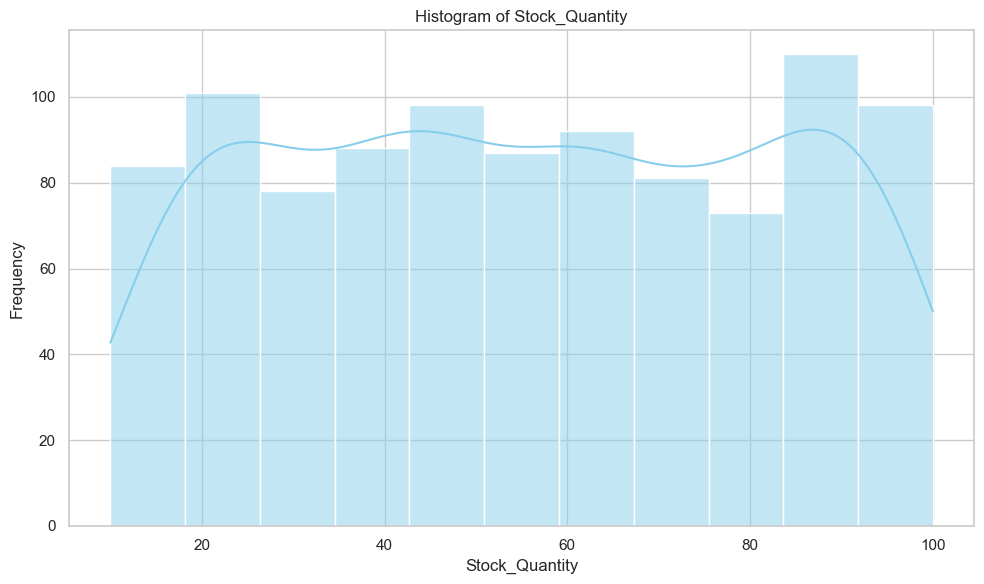

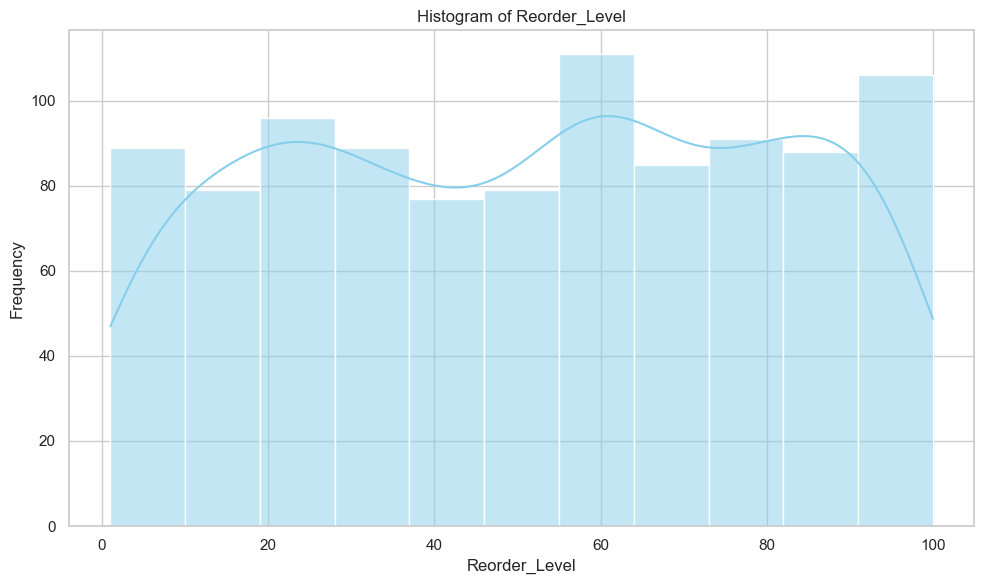

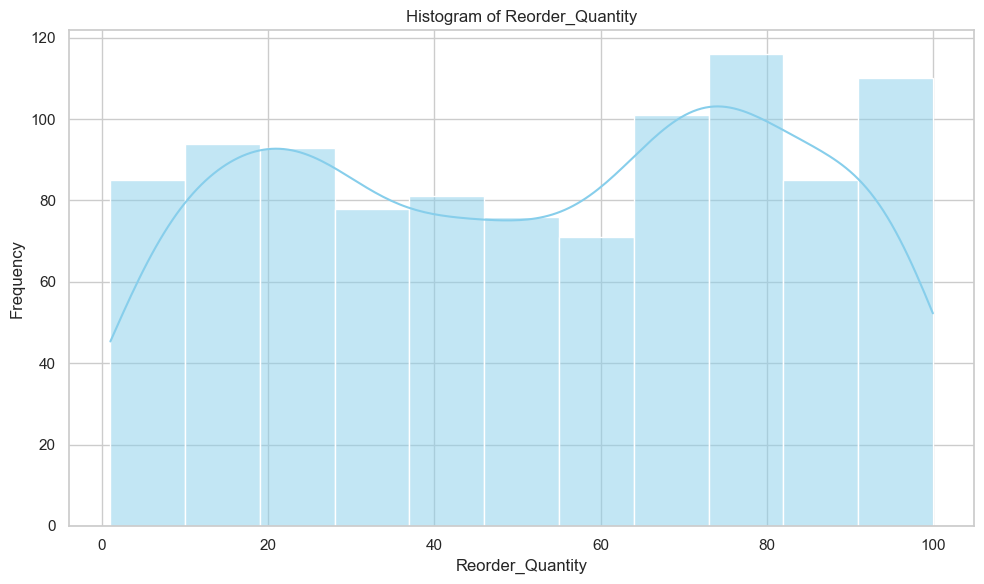

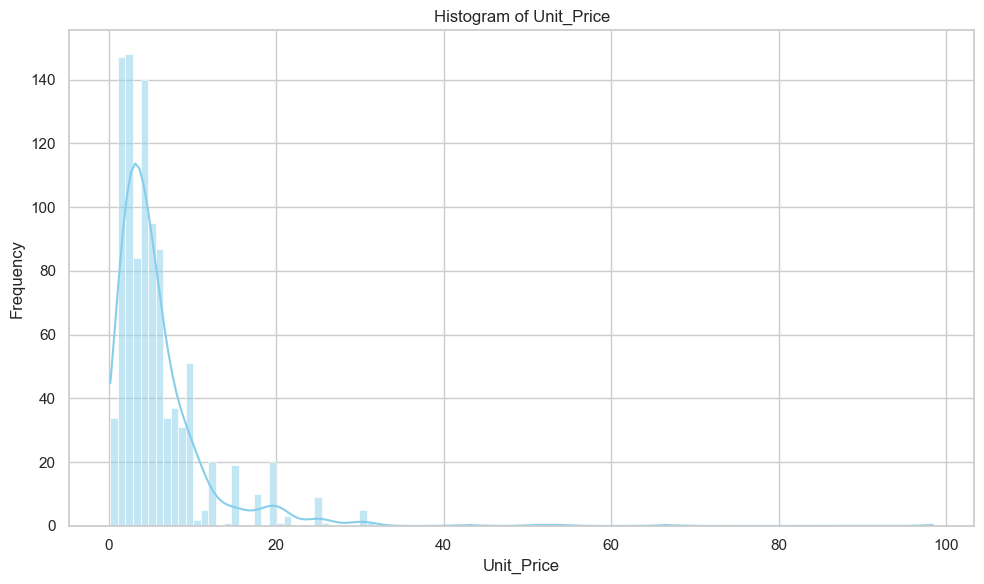

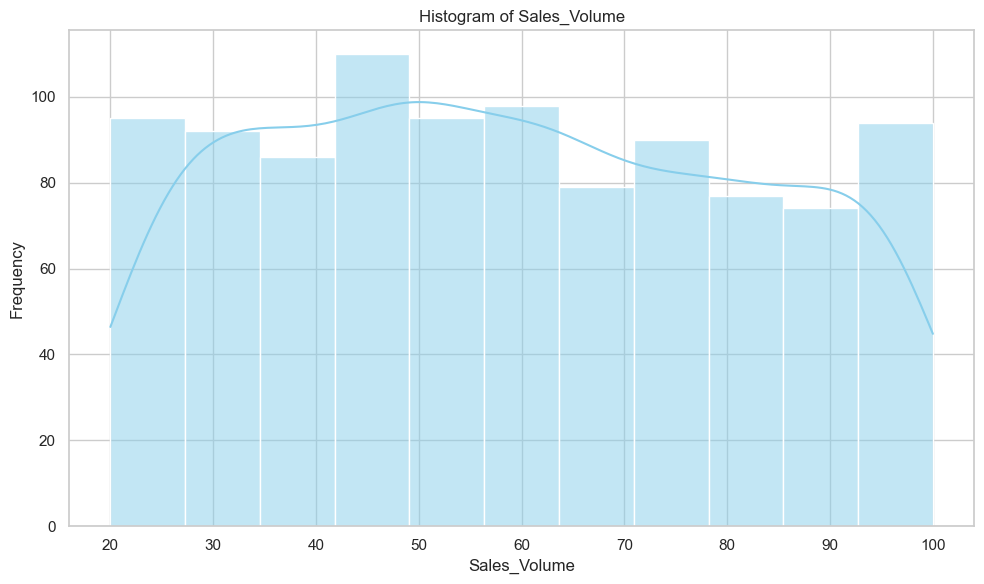

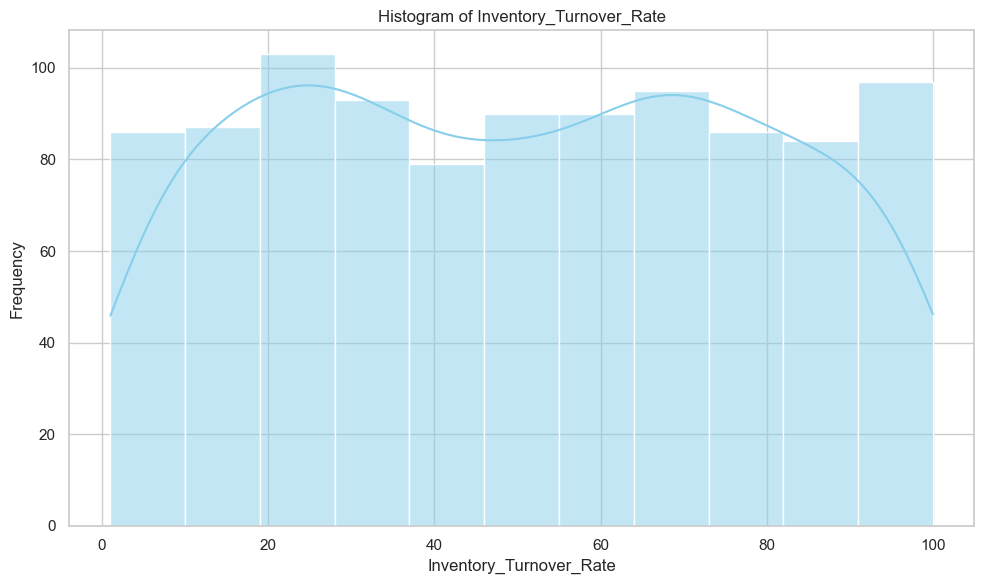

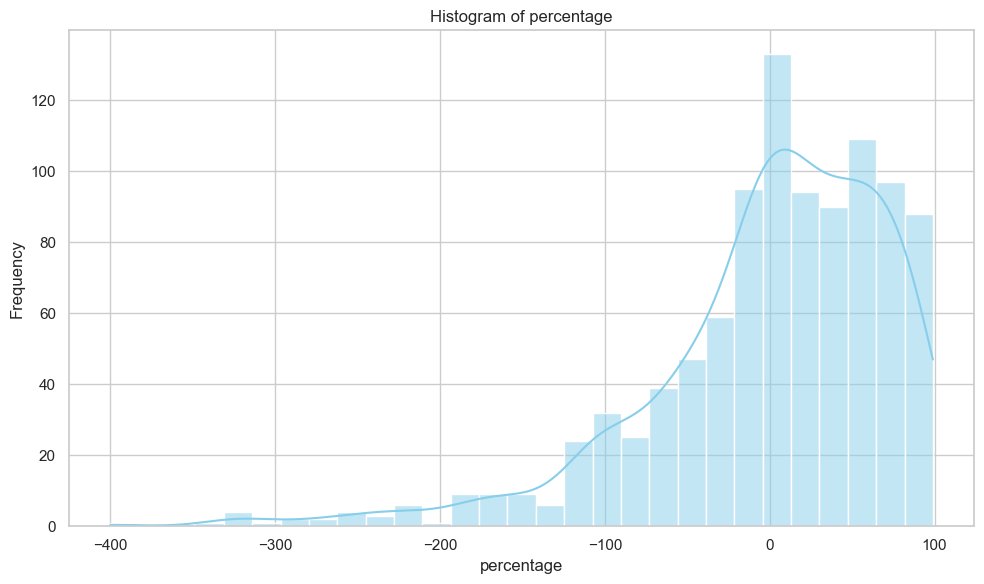

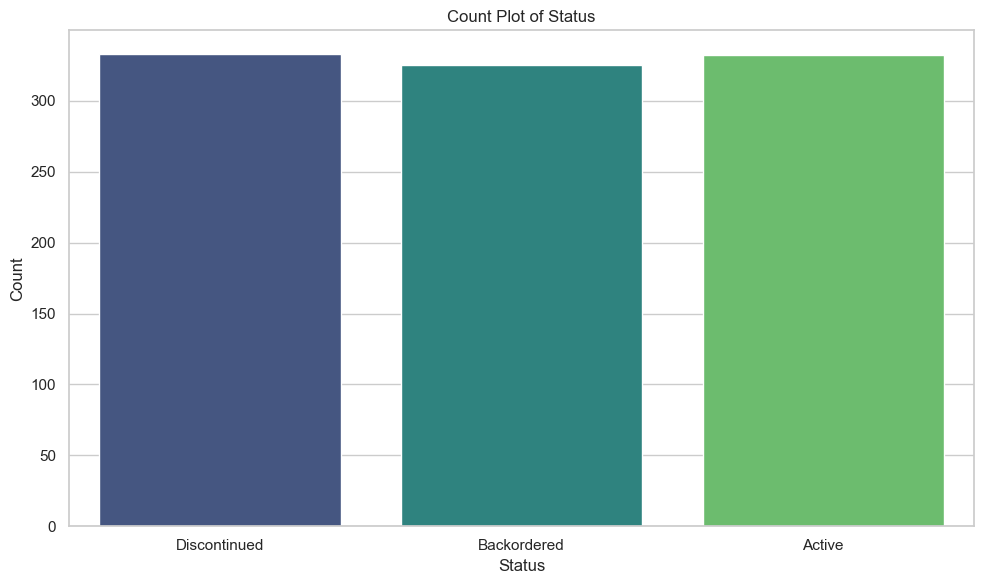

In [23]:
# Descriptive statistics
print(df.describe())

# Histogram for numerical columns
numeric_df = df.select_dtypes(include=[np.number])
for col in numeric_df.columns:
    plt.figure()
    sns.histplot(numeric_df[col], kde=True, color='skyblue')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

# Count plot for categorical columns (using a sample column, e.g., 'Status')
plt.figure()
sns.countplot(data=df, x='Status', palette='viridis')
plt.title('Count Plot of Status')
plt.xlabel('Status')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

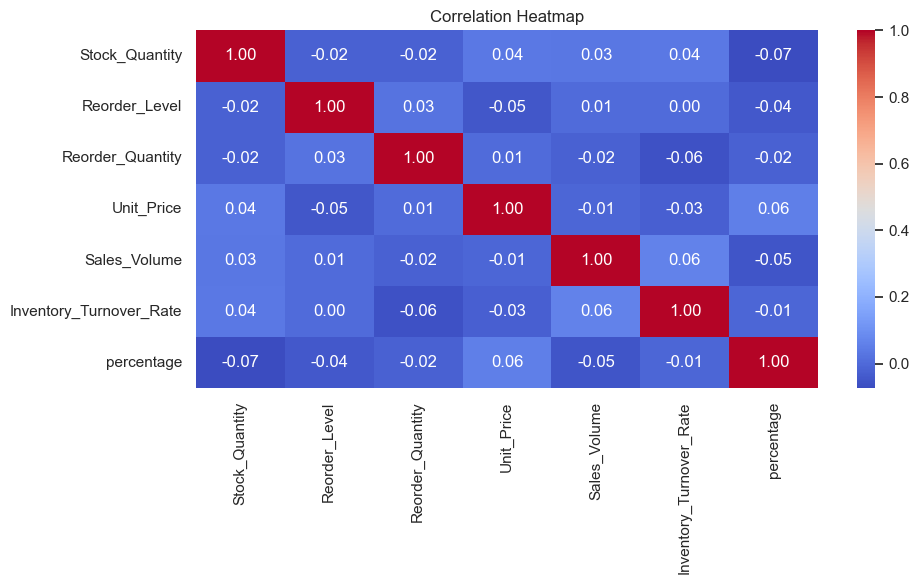

In [25]:
# Correlation heatmap: Only if there are four or more numeric columns
if numeric_df.shape[1] >= 4:
    plt.figure()
    corr = numeric_df.corr()
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Heatmap')
    plt.tight_layout()
    plt.show()

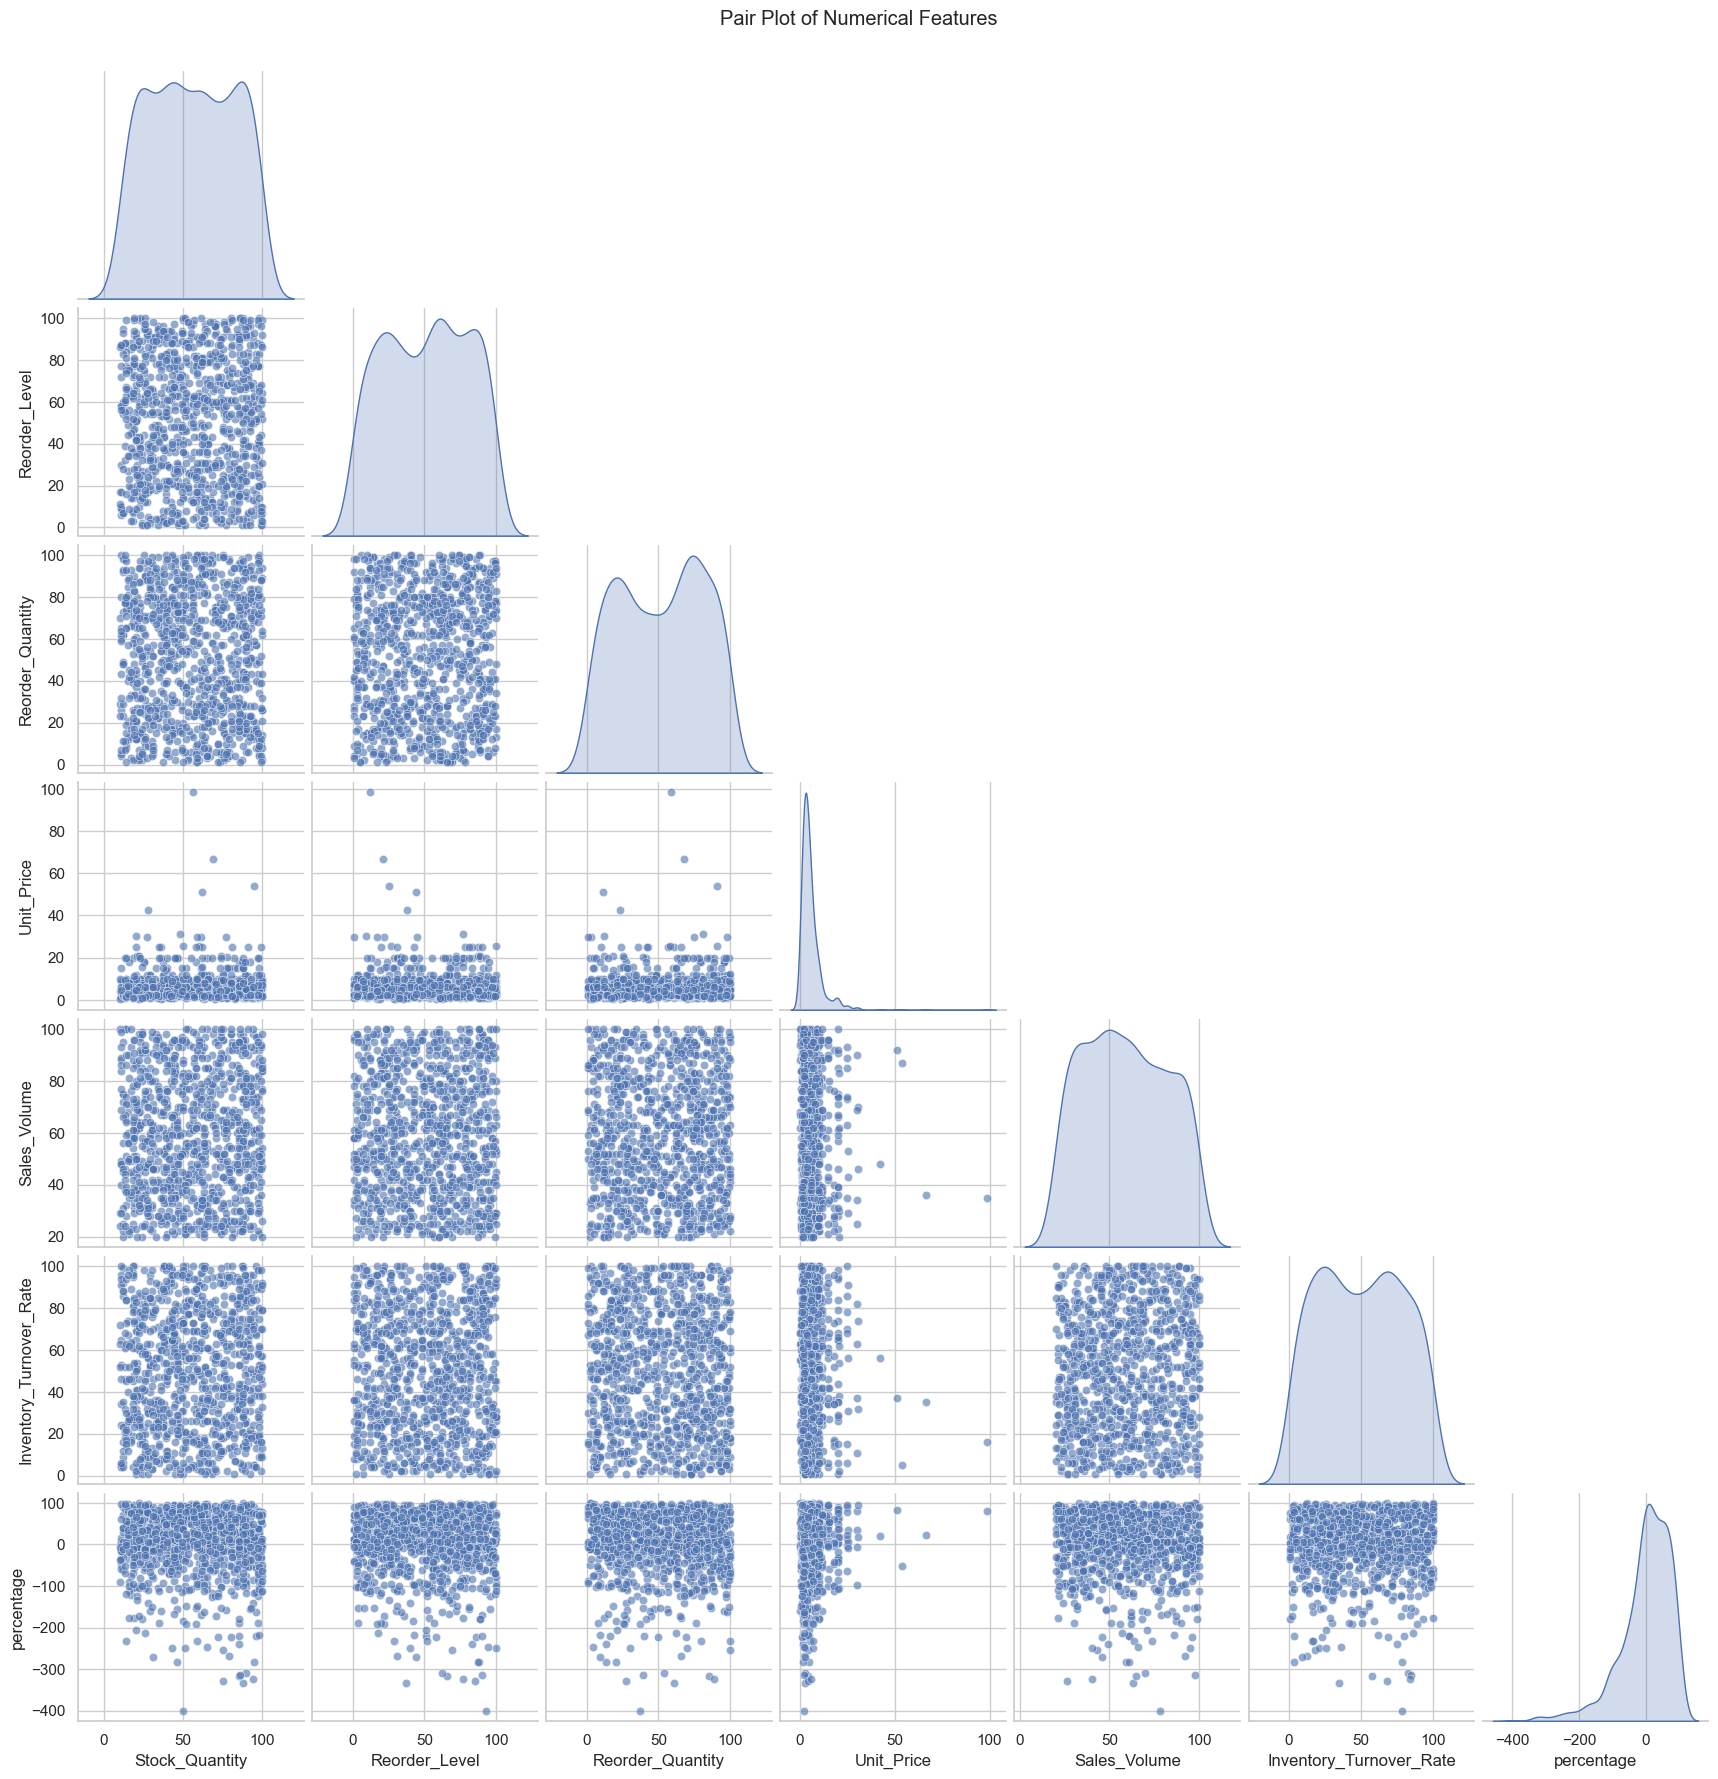

In [27]:
# Pair plot of numeric features
sns.pairplot(numeric_df, diag_kind='kde', corner=True, plot_kws={'alpha':0.6})
plt.suptitle('Pair Plot of Numerical Features', y=1.02)
plt.show()

In [29]:
# Select features and target for the predictor
target = 'Sales_Volume'
feature_cols = ['Stock_Quantity', 'Reorder_Level', 'Reorder_Quantity', 'Unit_Price', 'Inventory_Turnover_Rate', 'percentage']

# Ensure these columns exist in the dataframe
features = df[feature_cols].copy()
target_series = df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target_series, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict on the test set
y_pred = lr_model.predict(X_test)

# Evaluate the model using R^2 score
r2 = r2_score(y_test, y_pred)
print(f'Linear Regression R^2 Score: {r2:.3f}')

Linear Regression R^2 Score: -0.010


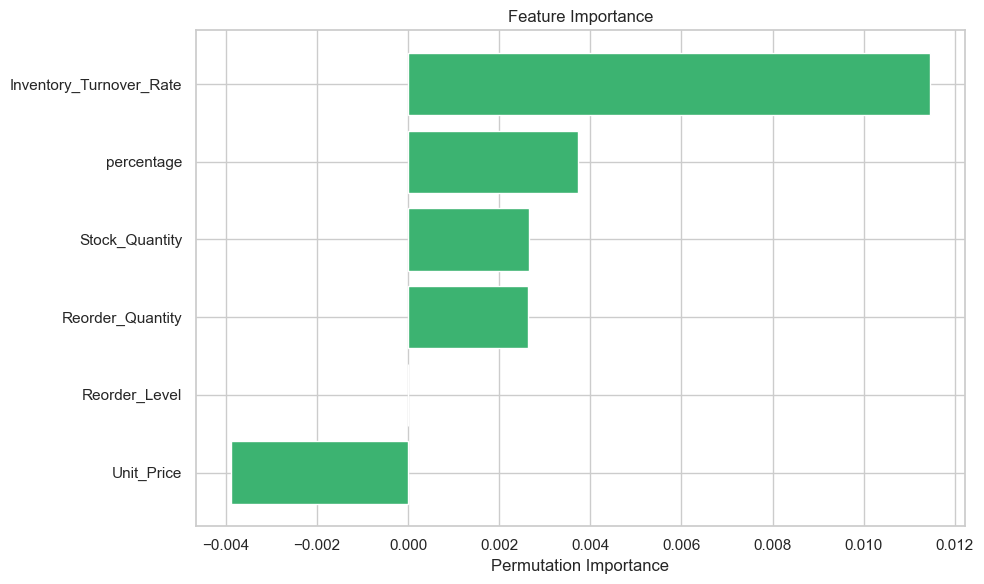

In [31]:
# Permutation Importance for the features
result = permutation_importance(lr_model, X_test, y_test, n_repeats=10, random_state=42)

importances = result.importances_mean
indices = np.argsort(importances)

plt.figure()
plt.barh(range(len(indices)), importances[indices], align='center', color='mediumseagreen')
plt.yticks(range(len(indices)), [feature_cols[i] for i in indices])
plt.xlabel('Permutation Importance')
plt.title('Feature Importance')
plt.tight_layout()
plt.show()

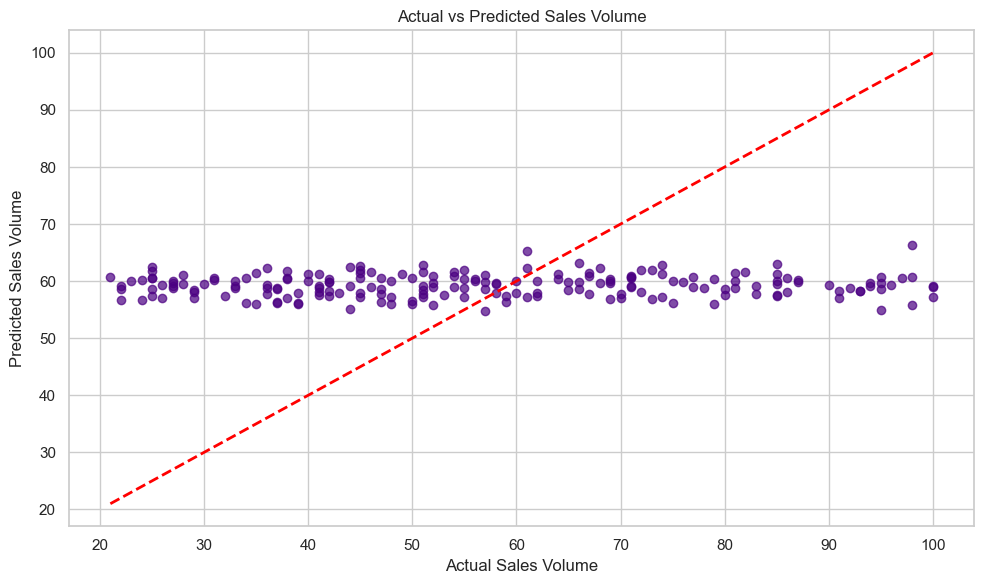

In [33]:
# Plot Actual vs Predicted Sales Volume
plt.figure()
plt.scatter(y_test, y_pred, alpha=0.7, color='indigo')
plt.xlabel('Actual Sales Volume')
plt.ylabel('Predicted Sales Volume')
plt.title('Actual vs Predicted Sales Volume')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red', linewidth=2)
plt.tight_layout()
plt.show()

In [ ]:
# Save the trained model using joblib
import joblib

joblib.dump(lr_model, 'Grocerymodel.pkl')

print("Model saved as 'trained_model.pkl'")


NameError: name 'model' is not defined